In [1]:
from pandas import read_csv, DataFrame
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [2]:
import sklearn
from sklearn import linear_model
import pandas as pd

In [33]:
df=pd.read_csv('datapr1.csv',';')
df=df.sort_values('fonds')
df.head()

,fonds,products
19,3.8,14.5
14,4.3,18.5
18,5.1,21.5
16,5.7,19.0
34,6.0,19.5


Intercept: 
 [11.5021163]
Coefficients: 
 [[1.43439961]]


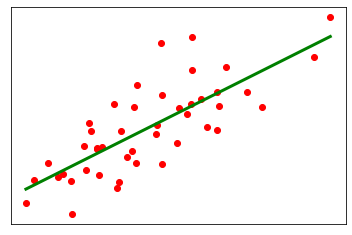

In [34]:
import matplotlib.pyplot as plt
x=df.fonds.values
y=df.products.values
x = x.reshape(len(x), 1)
y = y.reshape(len(y), 1)
regr = linear_model.LinearRegression()
regr.fit(x, y)
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)
# plot it as in the example at http://scikit-learn.org/
plt.scatter(x, y,  color='red')
plt.plot(x, regr.predict(x), color='green', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()


In [35]:
df2=pd.read_csv('data.csv',';')
n=20
k=5
df2.head()

,y,x1,x2,x3,x4,x5
0,9.7,1.59,0.26,2.05,0.32,0.14
1,8.4,0.34,0.28,0.46,0.59,0.66
2,9.0,2.53,0.31,2.46,0.30,0.31
3,9.9,4.63,0.40,6.44,0.43,0.59
4,9.6,2.16,0.26,2.16,0.39,0.16


In [36]:
df2.corr()

,y,x1,x2,x3,x4,x5
y,1.000000,0.430250,0.374079,0.403153,0.577310,0.332137
x1,0.430250,1.000000,0.854254,0.977908,0.110444,0.341013
x2,0.374079,0.854254,1.000000,0.881920,0.026852,0.459592
x3,0.403153,0.977908,0.881920,1.000000,0.029819,0.277923
x4,0.577310,0.110444,0.026852,0.029819,1.000000,0.570629
x5,0.332137,0.341013,0.459592,0.277923,0.570629,1.000000


In [37]:
corrtable=df2.corr()
corrtable['y'][4]

0.5773096006211361

In [38]:
corrtable['y'][4]**2

0.33328637496933566

In [39]:
k=1
Radj=1-(1-corrtable['y'][4]**2)*(n-1)/(n-k-1)
Radj

0.2962467291342987

In [40]:
k=2
Radj2=[1-(1-x**2)*(n-1)/(n-k) for x in [0.6850,0.6800,0.6950,0.5770]]
Radj2

[0.4397375, 0.43253333333333344, 0.4543041666666666, 0.2958695]

In [41]:
k=3
Radj3=[1-(1-x**2)*(n-1)/(n-k) for x in [0.6970,0.6960,0.7060]]
Radj3

[0.4253159411764704, 0.4237590588235294, 0.4394284705882352]

In [42]:
x = df2[['x3','x4']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
y = df2['y']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(x, y)
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 7.2908123337166835
Coefficients: 
 [0.28181176 3.47463508]
